In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment=None
pd.set_option('display.max_columns',60)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=24
from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale=2)

from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
dataset.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [4]:
dataset=dataset.replace({'Not Available':np.nan})
for col in list(dataset.columns):
    if('ft' in col or 'kBut ' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
         dataset[col]=dataset[col].astype(float)

In [5]:
dataset.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Weather Normalized Site Natural Gas Use (therms),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.784000e+03,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.364578e+05,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,4.022606e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.176952e+04,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.445525e+04,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,7.348107e+04,1.284677e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,869265.000000,939329.000000,6259.400000,9393.000000,986366.000000,3.942852e+09,4.958273e+08,2.094340e+07,2.094340e+07,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [6]:
dataset.isnull().sum().sort_values(ascending=False)

Fuel Oil #1 Use (kBtu)                                        11737
Diesel #2 Use (kBtu)                                          11730
Address 2                                                     11539
Fuel Oil #5 & 6 Use (kBtu)                                    11152
District Steam Use (kBtu)                                     10810
Fuel Oil #4 Use (kBtu)                                        10425
3rd Largest Property Use Type - Gross Floor Area (ft²)        10262
3rd Largest Property Use Type                                 10262
Fuel Oil #2 Use (kBtu)                                         9165
2nd Largest Property Use Type                                  8005
2nd Largest Property Use - Gross Floor Area (ft²)              8005
Metered Areas  (Water)                                         4609
Water Intensity (All Water Sources) (gal/ft²)                  3984
Water Use (All Water Sources) (kgal)                           3984
Latitude                                        

In [7]:
def missing_tables(df):
    mis=df.isnull().sum()
    mis_percent=100*df.isnull().sum()/len(df)
    mis_table=pd.concat([mis,mis_percent],axis=1)
    mis_table_columns=mis_table.rename(columns={0:'Missing Values',1:'% of Total Values'})
    mis_table_columns=mis_table_columns[mis_table_columns.iloc[:,1]!=0].sort_values( '% of Total Values',ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_table_columns.shape[0]) +
              " columns that have missing values.")
    return mis_table_columns

In [8]:
missing_tables(dataset)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [9]:
missing_df=missing_tables(dataset)
missing_columns=list(missing_df[missing_df['% of Total Values']>50].index)
print(len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
11


In [10]:
data=dataset.drop(list(missing_columns),axis=1)

In [11]:
missing_tables(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
Metered Areas (Water),4609,39.2
Water Intensity (All Water Sources) (gal/ft²),3984,33.9
Water Use (All Water Sources) (kgal),3984,33.9
NTA,2263,19.3
Census Tract,2263,19.3
Council District,2263,19.3
Community Board,2263,19.3
Longitude,2263,19.3
Latitude,2263,19.3
ENERGY STAR Score,2104,17.9


(array([299.,  91.,  69.,  70.,  57.,  59.,  54.,  57.,  72.,  48.,  44.,
         47.,  64.,  51.,  48.,  59.,  48.,  52.,  60.,  67.,  46.,  49.,
         58.,  58.,  52.,  60.,  51.,  68.,  70.,  64.,  50.,  70.,  73.,
         71.,  78.,  73.,  73.,  69.,  66.,  54.,  80.,  47.,  74.,  75.,
         66.,  66.,  61.,  91.,  91.,  93.,  77.,  89.,  79.,  87., 103.,
         83., 101.,  94., 108., 102.,  92.,  85., 102., 110., 112., 102.,
        119., 118., 114., 110., 110., 101., 128., 124., 108., 118., 123.,
        119., 126., 144., 126., 128., 138., 142., 126., 138., 128., 136.,
        127., 120., 112., 124., 125., 108., 119., 102., 109., 122., 162.,
        649.]),
 array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
          8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
         16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
         24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
         32.68,  33.67,  34.66

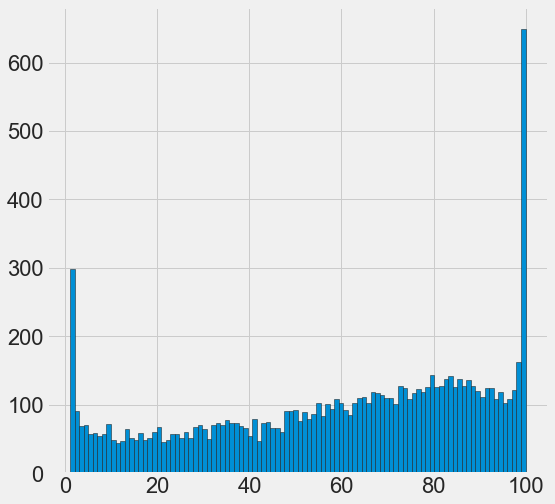

In [12]:
figsize(8,8)
data=data.rename(columns={'ENERGY STAR Score':'score'})
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(),bins = 100,edgecolor = 'k')#两端出现了异常值

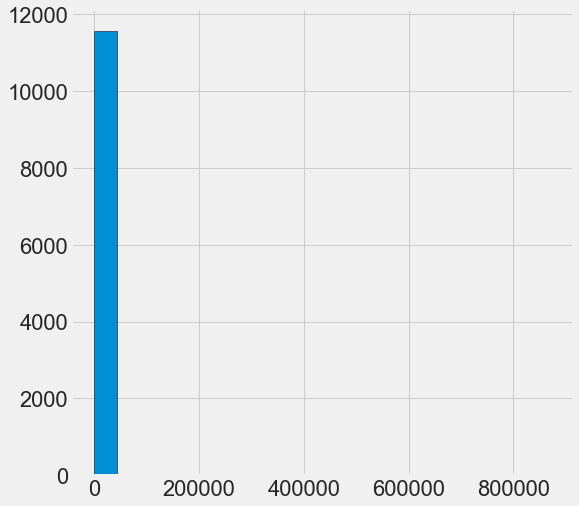

In [13]:
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=20,edgecolor='black');

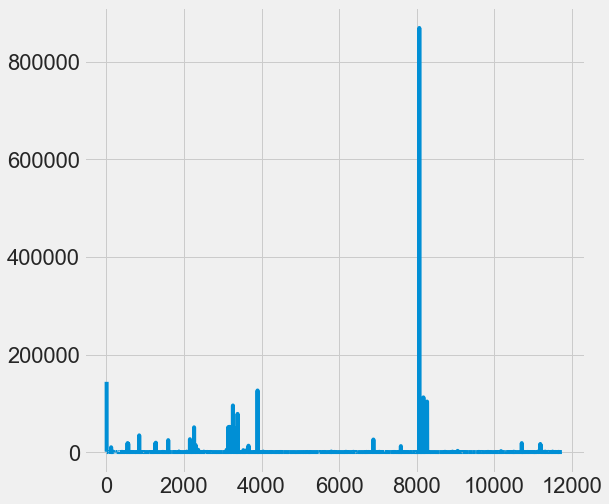

In [14]:
plt.plot(data['Site EUI (kBtu/ft²)'])

In [15]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [16]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [17]:
data.loc[data['Site EUI (kBtu/ft²)']==869265.0,:]#异常值

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,49459193300,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [18]:
#去除异常值，考虑使用极端异常值的定义
# 在低端，极端异常值低于 $\text{First Quartile} -3 * \text{Interquartile Range}$
#在高端，极端异常值高于 $\text{Third Quartile} + 3 * \text{Interquartile Range}$
first_quartile=data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile=data['Site EUI (kBtu/ft²)'].describe()['75%']
iqr=third_quartile-first_quartile
data=data[(data['Site EUI (kBtu/ft²)']>(first_quartile-3*iqr))&(data['Site EUI (kBtu/ft²)']<(first_quartile+3*iqr))]

(array([ 196.,  254.,  288.,  289.,  327.,  435.,  765., 1231., 1555.,
        1514., 1267.,  952.,  648.,  448.,  316.,  213.,  151.,  128.,
          94.,   66.]),
 array([  0.   ,   8.455,  16.91 ,  25.365,  33.82 ,  42.275,  50.73 ,
         59.185,  67.64 ,  76.095,  84.55 ,  93.005, 101.46 , 109.915,
        118.37 , 126.825, 135.28 , 143.735, 152.19 , 160.645, 169.1  ]),
 <a list of 20 Patch objects>)

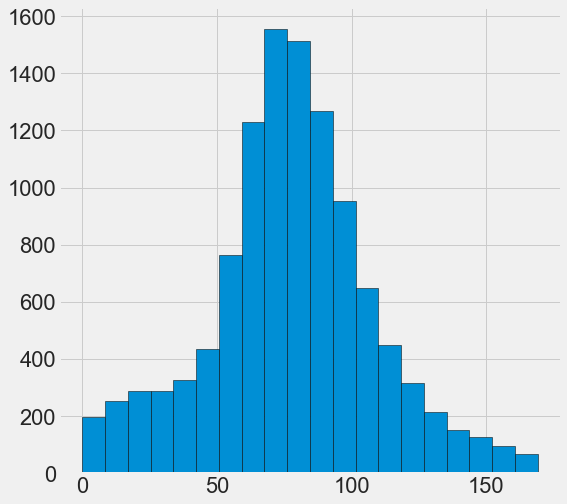

In [19]:
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=20,edgecolor='black')
#此时图像接近正态分布

In [20]:
#建筑物的类型划分统计
types=data.dropna(subset=['score'])
alltypes_num=types['Largest Property Use Type'].value_counts()
print(alltypes_num)

Multifamily Housing                      7386
Office                                   1134
Hotel                                     186
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   95
Senior Care Community                      71
Distribution Center                        61
Retail Store                               56
Medical Office                             22
Financial Office                           12
Hospital (General Medical & Surgical)      12
Worship Facility                            9
Refrigerated Warehouse                      8
Supermarket/Grocery Store                   6
Wholesale Club/Supercenter                  3
Parking                                     3
Courthouse                                  2
Bank Branch                                 1
Name: Largest Property Use Type, dtype: int64


In [21]:
types=list(alltypes_num[alltypes_num.values>90].index)
print(types)

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse', 'K-12 School', 'Residence Hall/Dormitory']


12        True
17       False
18        True
19        True
20        True
         ...  
11741     True
11742     True
11743     True
11744     True
11745     True
Name: Largest Property Use Type, Length: 11137, dtype: bool
12       False
17       False
18       False
19       False
20       False
         ...  
11741    False
11742    False
11743    False
11744    False
11745    False
Name: Largest Property Use Type, Length: 11137, dtype: bool
12       False
17       False
18       False
19       False
20       False
         ...  
11741    False
11742    False
11743    False
11744    False
11745    False
Name: Largest Property Use Type, Length: 11137, dtype: bool
12       False
17       False
18       False
19       False
20       False
         ...  
11741    False
11742    False
11743    False
11744    False
11745    False
Name: Largest Property Use Type, Length: 11137, dtype: bool
12       False
17       False
18       False
19       False
20       False
         ...  
11741    F

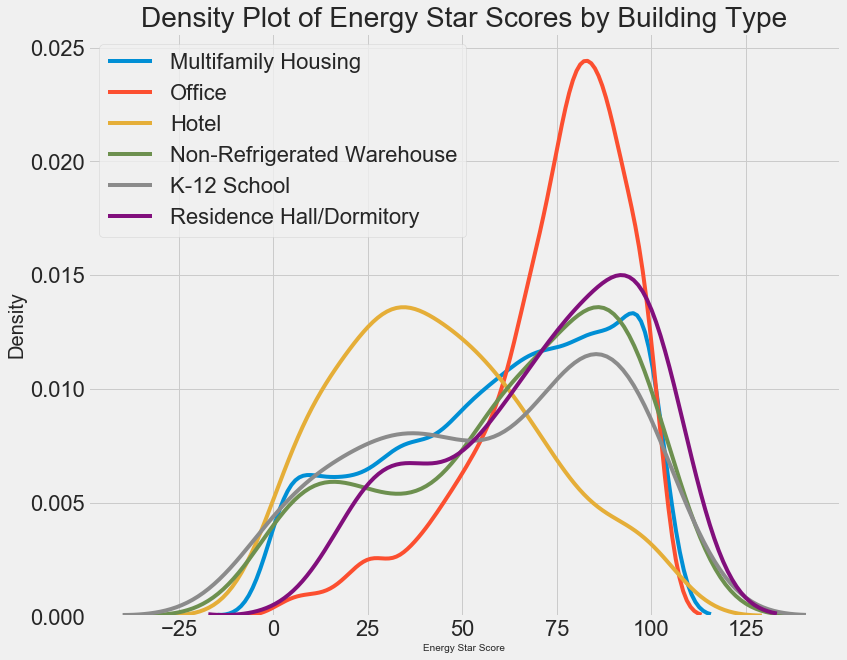

In [22]:
figsize(12,10)
for b_type in types:
    subset=data[data['Largest Property Use Type']==b_type]
    print(data['Largest Property Use Type']==b_type)
    sns.kdeplot(subset['score'].dropna(),label=b_type,shade=False)
plt.xlabel('Energy Star Score',size=10);
plt.ylabel('Density',size=20);
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [23]:
#办公楼的分数总体高，而酒店的分数较低
boroughs=data.dropna(subset=['score'])
allboroughs_num=boroughs['Borough'].value_counts()
print(allboroughs_num)
boroughs=list(allboroughs_num[allboroughs_num.values>100].index)

Manhattan        3926
Brooklyn         1930
Queens           1673
Bronx            1633
Staten Island     114
Name: Borough, dtype: int64


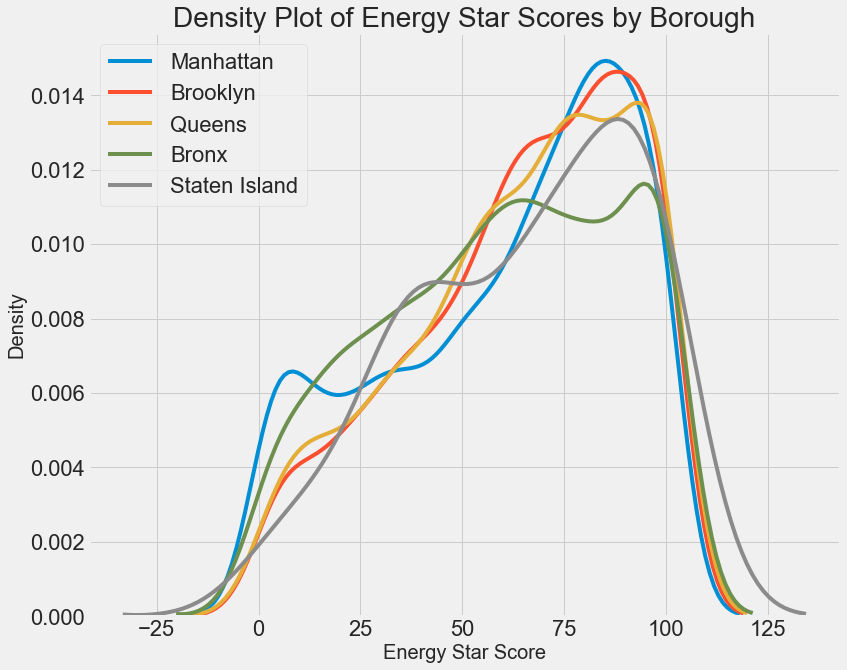

In [24]:
figsize(12,10)
for b in boroughs:
    subset=data[data['Borough']==b]
   # print(subset)
    sns.kdeplot(subset['score'].dropna(),label=b)
plt.xlabel('Energy Star Score', size = 20); 
plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
#自治市镇的差异不明显

In [25]:
#pearson相关系数探索相关性
correlations_data=data.corr()['score'].sort_values()
print(correlations_data.head(15))

print('\n',correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.722387
Weather Normalized Site EUI (kBtu/ft²)                       -0.709932
Weather Normalized Source EUI (kBtu/ft²)                     -0.649943
Source EUI (kBtu/ft²)                                        -0.645732
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.354165
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.324983
Direct GHG Emissions (Metric Tons CO2e)                      -0.139004
Weather Normalized Site Natural Gas Use (therms)             -0.127951
Year Built                                                   -0.127209
Total GHG Emissions (Metric Tons CO2e)                       -0.099879
Latitude                                                     -0.048605
Property Id                                                  -0.046193
Weather Normalized Site Electricity (kWh)                    -0.042811
Longitude                                                    -0.040808
Indire

In [26]:
#s对数值变量进行对数和平方很互换，对于离散变量进行独热编码,将它们进行拼接然后计算相关性
numeric_subset=data.select_dtypes('number')
for col in numeric_subset.columns:
    if col=='score':
        next
    else:
        numeric_subset['sqrt_'+col]=np.sqrt(numeric_subset[col])
        numeric_subset['log_'+col]=np.log(numeric_subset[col])
categorical_subset=data[['Borough','Largest Property Use Type']]
categorical_subset=pd.get_dummies(categorical_subset)

features=pd.concat([numeric_subset,categorical_subset],axis=1)

features=features.dropna(subset=['score'])

correlations=features.corr()['score'].dropna().sort_values()

        

F:\python\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
F:\python\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
F:\python\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
correlations.head(15)#负相关

Site EUI (kBtu/ft²)                                            -0.722387
Weather Normalized Site EUI (kBtu/ft²)                         -0.709932
sqrt_Site EUI (kBtu/ft²)                                       -0.688800
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.676475
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.665649
sqrt_Source EUI (kBtu/ft²)                                     -0.664640
Weather Normalized Source EUI (kBtu/ft²)                       -0.649943
Source EUI (kBtu/ft²)                                          -0.645732
log_Source EUI (kBtu/ft²)                                      -0.612520
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.609191
log_Site EUI (kBtu/ft²)                                        -0.598459
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.587053
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.417471
sqrt_Weather Normalized Site Electricity Intensity 

In [28]:
correlations.tail(15)#正相关

log_Largest Property Use Type - Gross Floor Area (ft²)             0.029532
sqrt_Order                                                         0.029984
Largest Property Use Type_Residence Hall/Dormitory                 0.035641
Borough_Queens                                                     0.035793
Order                                                              0.039530
Largest Property Use Type_Hospital (General Medical & Surgical)    0.045498
Borough_Brooklyn                                                   0.045735
log_Community Board                                                0.053792
Community Board                                                    0.054609
sqrt_Community Board                                               0.056085
sqrt_Council District                                              0.058970
log_Council District                                               0.059086
Council District                                                   0.060450
Largest Prop

F:\python\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


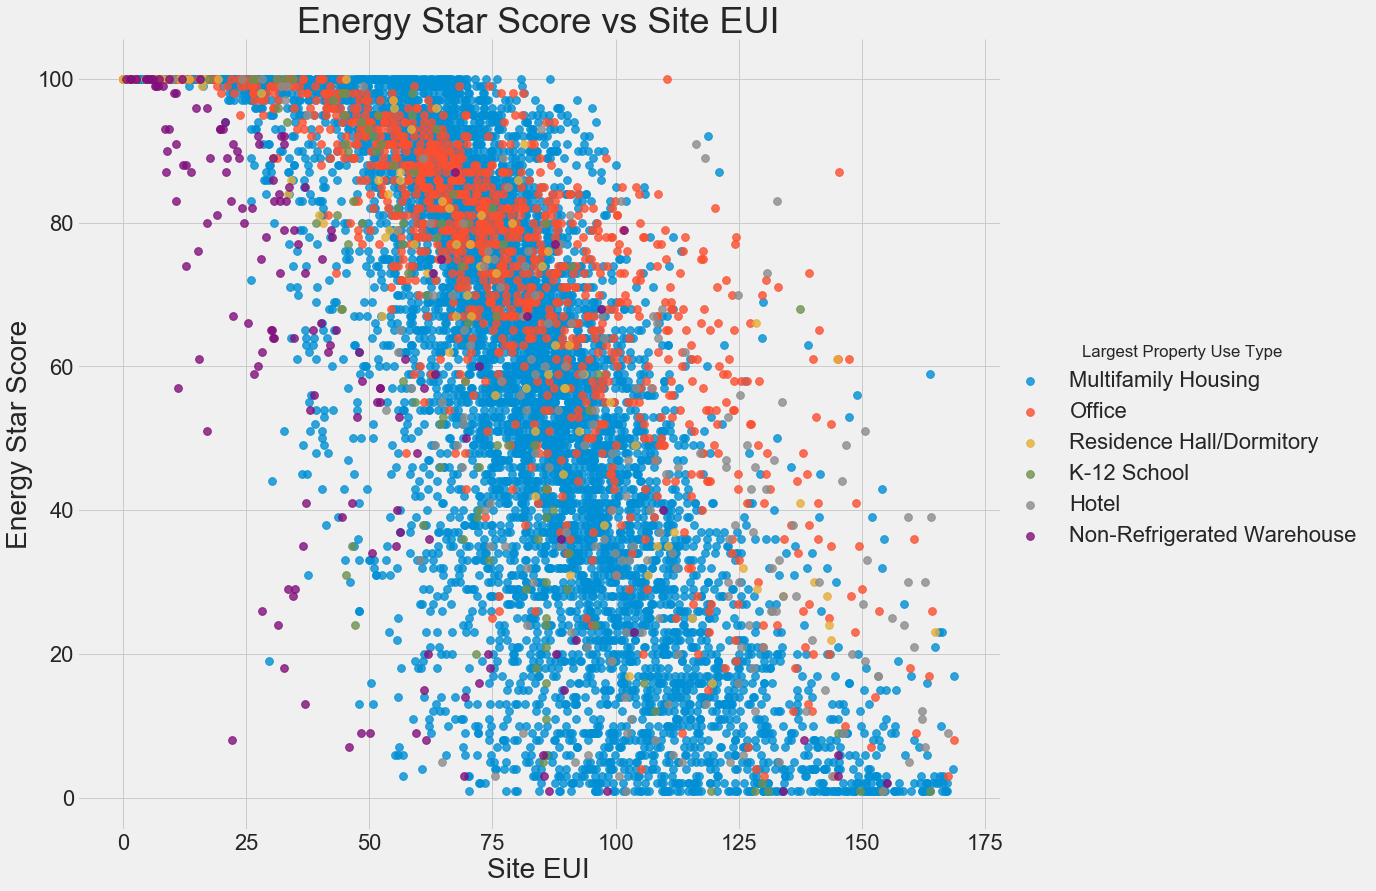

In [29]:
figsize(12,10)
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']
features=features[features['Largest Property Use Type'].isin(types)]
sns.lmplot('Site EUI (kBtu/ft²)','score',
          hue='Largest Property Use Type',
          data=features,
           scatter_kws = {'alpha':0.8,'s': 60},
          fit_reg = False,
          size = 12,
          aspect = 1.2)

plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

F:\python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


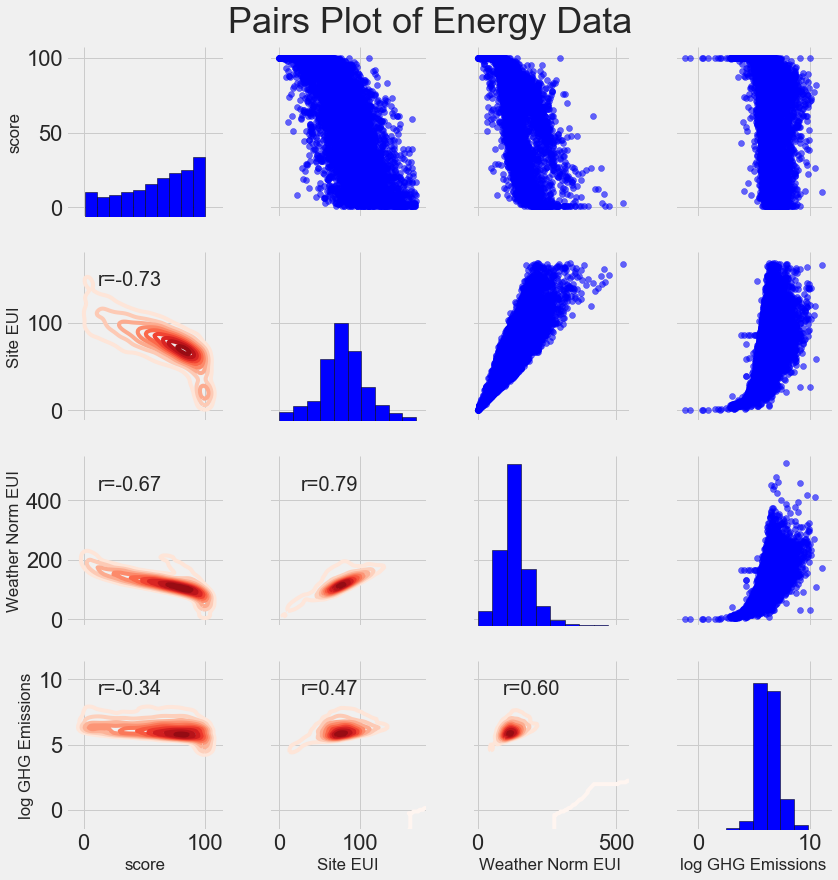

In [30]:
#site eui和得分之间是负相关关系
plot_data=features[['score',
                     'Site EUI (kBtu/ft²)',
                     'Weather Normalized Source EUI (kBtu/ft²)',
                     'log_Total GHG Emissions (Metric Tons CO2e)']]
plot_data=plot_data.replace({np.inf:np.nan,-np.inf:np.nan})
plot_data=plot_data.rename(columns={'Site EUI (kBtu/ft²)': 'Site EUI',
                                        'Weather Normalized Source EUI (kBtu/ft²)':'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})
plot_data=plot_data.dropna()

def corr_func(x,y,**kwargs):
    r=np.corrcoef(x,y)[0][1]
    ax=plt.gca()
    ax.annotate("r={:.2f}".format(r),
                xy=(.2,.8),
                xycoords=ax.transAxes,
                size=20)

grid=sns.PairGrid(data=plot_data,size=3)#创建pairgrid对象
grid.map_upper(plt.scatter,color='blue',alpha=0.6)#上三角是散点图
# 对角线是直方图
grid.map_diag(plt.hist,color ='blue',edgecolor = 'black')
#下三角位相关系数和二维核密度
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot,cmap=plt.cm.Reds)
plt.suptitle('Pairs Plot of Energy Data',size=36,y=1.02);
            

In [31]:
#特征工程 数值变量进行归一化处理 分类变量只选取两个并且进行one-hot编码处理
features=data.copy()
numeric_subset=data.select_dtypes('number')
for col in numeric_subset.columns:
    if col=='score':
        next
    else:
        numeric_subset['log_'+col]=np.log(numeric_subset[col])
cat=data[['Borough','Largest Property Use Type']]

categorical_subset=pd.get_dummies(categorical_subset)
features=pd.concat([numeric_subset,categorical_subset],axis=1)
print(features.shape)
        

(11137, 106)


Text(0, 0.5, 'Weather Norm EUI')

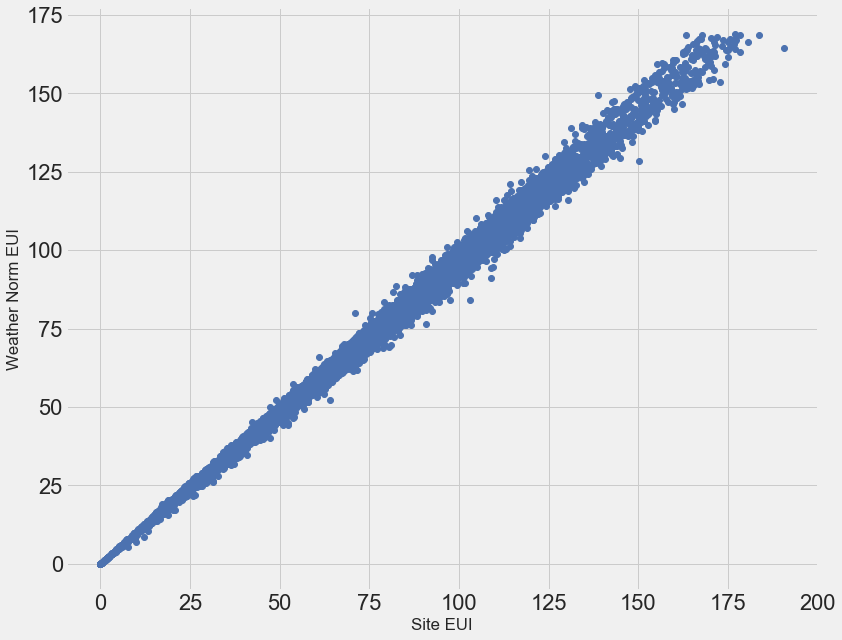

In [32]:
#去除共线特征 （高共线特征：它们之间存在显著的相关系数）
plot_data=data[['Weather Normalized Site EUI (kBtu/ft²)','Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Weather Normalized Site EUI (kBtu/ft²)'],plot_data['Site EUI (kBtu/ft²)'],'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')

In [33]:
def remove_collinear_features(x,threshold):
    y=x['score']
    x=x.drop(columns=['score'])
    corr_matrix=x.corr()
    iters=range(len(corr_matrix.columns)-1)
    drop_cols=[]
    for i in iters:
        for j in range(i):
            item=corr_matrix.iloc[j:(j+1),(i+1):(i+2)]
            col=item.columns
            row=item.index
            val=abs(item.values)
            if val>=threshold:
                drop_cols.append(col.values[0])
    drops=set(drop_cols)
    x=x.drop(columns=drops)
    x=x.drop(columns=['Weather Normalized Site EUI (kBtu/ft²)', 
                      'Water Use (All Water Sources) (kgal)',
                      'log_Water Use (All Water Sources) (kgal)',
                      'Largest Property Use Type - Gross Floor Area (ft²)'])
    x['score']=y
    return x
features = remove_collinear_features(features, 0.6)

F:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater_equal
  del sys.path[0]


In [34]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11137, 66)

In [35]:
no_score=features[features['score'].isna()]
score=features[features['score'].notnull()]
print(no_score.shape)
print(score.shape)


(1817, 66)
(9320, 66)


In [36]:
features = score.drop(columns = 'score')
targets = pd.DataFrame(score['score'])
features = features.replace({np.inf: np.nan, -np.inf: np.nan})
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6524, 65)
(2796, 65)
(6524, 1)
(2796, 1)


In [37]:
def mae(y_true,y_pred):
    return np.mean(abs(y_true-y_pred))

In [38]:
baseline_guess=np.median(y)
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 67.00
Baseline Performance on the test set: MAE = 24.2675


In [39]:
no_score.to_csv('data/no_score.csv',index=False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

In [40]:
from sklearn.preprocessing import Imputer,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [41]:
train_features=pd.read_csv('data/training_features.csv')
test_features=pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6524, 65)
Testing Feature Size:   (2796, 65)
Training Labels Size:   (6524, 1)
Testing Labels Size:    (2796, 1)


In [42]:
train_features.head(12)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Site Natural Gas Use (therms),Water Intensity (All Water Sources) (gal/ft²),Latitude,Longitude,Community Board,Census Tract,log_Direct GHG Emissions (Metric Tons CO2e),log_Water Intensity (All Water Sources) (gal/ft²),Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,...,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,6412,4520863,177094.0,1931,1,100,82.7,17.3,0.3,44319.0,NaN,40.816133,-73.917503,1.0,71.0,5.363637,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8294,4398329,72750.0,1929,1,100,92.2,2.6,0.8,61616.6,NaN,40.840093,-73.846132,10.0,200.0,5.783517,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1996,2591543,219718.0,1930,1,100,92.1,11.0,0.6,238719.0,NaN,40.743004,-73.992721,5.0,58.0,7.011845,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9963,2810089,228879.0,1951,1,100,53.7,8.7,0.3,65563.7,0.65,40.727016,-73.933892,1.0,589.0,5.692384,-0.430783,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4462,2664583,194856.0,1962,1,100,82.6,8.6,0.3,62564.0,NaN,40.770917,-73.959742,8.0,126.0,5.812338,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,13347,4040481,105000.0,1939,1,100,108.4,3.4,0.0,5395.0,NaN,NaN,NaN,NaN,NaN,6.648337,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6630,3260049,92065.0,1920,1,100,127.1,19.1,NaN,NaN,57.23,40.831527,-73.920093,4.0,18102.0,6.015669,4.047078,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,428,5877235,NaN,1975,1,100,135.6,9.8,1.1,63920.0,NaN,NaN,NaN,NaN,NaN,5.776103,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

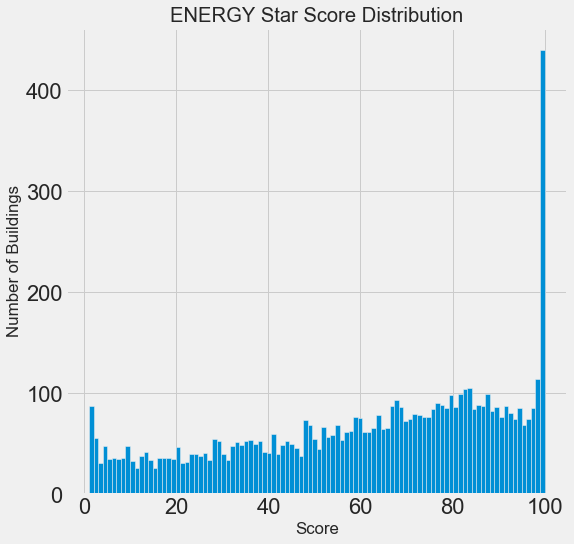

In [43]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score'); 
plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

In [44]:
imputer=Imputer(strategy='median')#使用中值补充缺失值
imputer.fit(train_features)
X=imputer.transform(train_features)
X_test=imputer.transform(test_features)


F:\python\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
print('Missing values in training features:', np.sum(np.isnan(X)))
print('Missing values in testing features:',np.sum(np.isnan(X_test)))

Missing values in training features: 0
Missing values in testing features: 0


In [46]:
#特征缩放（线性回归和随机森林不需要特征缩放但其他方法（例如支持向量机和k-最近邻）确实需要它，因为它们考虑了观测之间的欧氏距离。因此，在比较多个算法时，最佳做法是特征缩放。
#）
scaler=MinMaxScaler(feature_range=(0,1))#创建范围为0-1的缩放器对象
scaler.fit(X)
X=scaler.transform(X)
X_test=scaler.transform(X_test)


In [47]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [48]:
def mae(y_true,y_pred):
    return np.mean(abs(y_true-y_pred))

def fit_and_evaluate(model):
    model.fit(X,y)
    model_pred=model.predict(X_test)#在测试集上评估模型
    model_mae=mae(y_test,model_pred)
    #print(model,"model_mae:",model_mae)
    return  model_mae
    

In [49]:
# 线性回归
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f'% lr_mae)

Linear Regression Performance on the test set: MAE = 13.0470


In [50]:
#SVM模型，找出预测效果较好的C与gamma
figsize(20,10)
t=float("inf")
for i in [10,100,1000]:
    for j in [0.01,0.05,0.1,0.5,0.8]:
        svm=SVR(C=i,gamma=j)
        svm.fit(X,np.ravel(y))
        model_pred=svm.predict(X_test)
        model_mae=mae(model_pred,np.ravel(y_test))
        t=min(model_mae,t)
        print('C:',i,'gamma:',j,'model_mae',model_mae)

C: 10 gamma: 0.01 model_mae 15.649942893395123
C: 10 gamma: 0.05 model_mae 12.925494156962943
C: 10 gamma: 0.1 model_mae 12.087883849217686
C: 10 gamma: 0.5 model_mae 10.786404273909094
C: 10 gamma: 0.8 model_mae 10.470913661449549
C: 100 gamma: 0.01 model_mae 12.874065318293344
C: 100 gamma: 0.05 model_mae 11.49054973512188
C: 100 gamma: 0.1 model_mae 11.069716612520626
C: 100 gamma: 0.5 model_mae 10.129985260104702
C: 100 gamma: 0.8 model_mae 9.743881576952623
C: 1000 gamma: 0.01 model_mae 11.875556442307424
C: 1000 gamma: 0.05 model_mae 10.977655109577743
C: 1000 gamma: 0.1 model_mae 10.758707027723684
C: 1000 gamma: 0.5 model_mae 9.747491876000018
C: 1000 gamma: 0.8 model_mae 9.77426697300486


In [51]:
# 支持向量机
svm = SVR(C=100,gamma =0.8)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 9.7439


In [52]:
# 随机森林
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = fit_and_evaluate(random_forest)
print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)


F:\python\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 9.6483


In [53]:
gradient_boosted=GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)
print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 9.8919


In [54]:
# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 12.4443


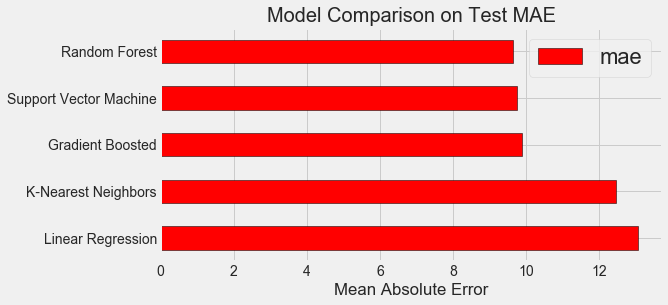

In [55]:
plt.style.use('fivethirtyeight')
figsize(8, 4)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model':['Linear Regression',
                                          'Support Vector Machine',
                                          'Random Forest',
                                          'Gradient Boosted',
                                          'K-Nearest Neighbors'],
                                'mae':[lr_mae,
                                       svm_mae,
                                       random_forest_mae, 
                                       gradient_boosted_mae, 
                                       knn_mae]})
# 测试集上 mae的水平条形图
model_comparison.sort_values('mae',ascending = False).plot(x = 'model',
                                                           y = 'mae',
                                                           kind = 'barh',
                                                           color = 'red', 
                                                           edgecolor = 'black')
# 绘图格式
plt.ylabel('');
plt.yticks(size = 14);

plt.xlabel('Mean Absolute Error');
plt.xticks(size = 14)

plt.title('Model Comparison on Test MAE', size = 20);

In [56]:
loss=['ls','lad','huber']
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
min_samples_leaf = [1,2,4,6,8]
min_samples_split=[2,4,6,10]
max_features=['auto','sqrt','log2',None]
hyperparameter_grid={'loss':loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}  

In [57]:

model = GradientBoostingRegressor(random_state = 42)


random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
random_cv.fit(X,y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
